              precision    recall  f1-score   support

           0       0.99      0.99      0.99       614
           1       0.98      0.99      0.99       483

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



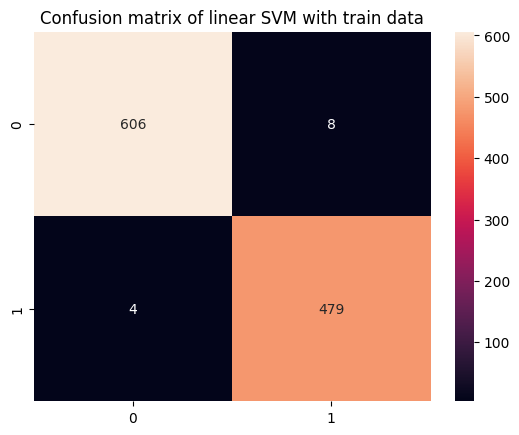

In [ ]:
import pandas as pd
data_link="https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]

bankdata = pd.read_csv(data_link, names=col_names, sep=",", header=None)
bankdata.head()
bankdata.describe().T
import seaborn as sns
y = bankdata['class']
X = bankdata.drop('class', axis=1)
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits= load_digits()
digits.target
dir(digits)
df=pd.DataFrame(digits.data,digits.target)
df.head()
df['target']= digits.target
df.head(20)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(df.drop('target',axis='columns'),df.target, test_size=0.3)
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train,Y_train)

SVC()

In [ ]:
import pandas as pd
data=pd.read_csv("/content/fetal_health.csv")
data.head(5)


In [ ]:
print(data.shape)


In [ ]:
print(data.info())

In [ ]:
print(data.describe())

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
x=data['accelerations']
y=data['baseline value']
plt.scatter(x,y,marker='x')

In [ ]:
data['fetal_health'].value_counts().plot.pie();

In [ ]:
data['fetal_health'].plot.hist();

In [ ]:
data['fetal_health'].plot.box();

In [ ]:
data.plot();

In [ ]:
data['fetal_health'].plot.bar();

In [ ]:
px.box(data,x=data.columns)

In [ ]:
px.violin(data,x='accelerations')

In [ ]:
plt.imshow(data, cmap='gray', interpolation='quadric')

In [ ]:
x=data['accelerations']
y=data['baseline value']
bubble_sizes = 0.4
plt.scatter(x,y,s=bubble_sizes)

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

In [ ]:
import pandas as pd
data=pd.read_csv("/content/fetal_health.csv")
dup = data.duplicated().sum()
print(dup)

13


In [ ]:
data=pd.read_csv("/content/fetal_health.csv")
data.drop_duplicates(inplace=True)
data.shape

(2113, 22)

remove duplicates # drop duplicate

class balance


In [ ]:
(data.isnull()).any()

In [ ]:
(data.nunique()).any()

In [ ]:
data.nunique()

In [ ]:
data["fetal_health"].nunique()

In [ ]:
x=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']
y.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE(random_state=42).fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct= '%.2f')

NameError: ignored

Train accuracy test, confusion matrix,classiicatioo  report,

In [ ]:
y_res.value_counts()

126.0 140.0
105.0 161.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7d0c040ef010>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0c040ef550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0c040eee90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0c040efa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0c040efd30>],
 'means': []}

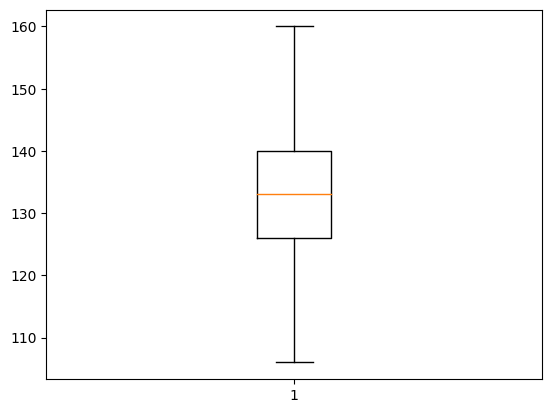

In [ ]:
import numpy as np
data['baseline value'].sort_values(ascending=True)
quantile1,quantile3=np.percentile(data['baseline value'],[25,75])
print(quantile1,quantile3)
iqr=quantile3-quantile1
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)
print(lower_bound,upper_bound)
outliers=data[(data['baseline value']<lower_bound) | (data['baseline value']>upper_bound)]
median_value=data['baseline value'].median()
data.loc[outliers.index,'baseline value']=median_value
plt.boxplot(data['baseline value'])


In [ ]:
x=data['histogram_median']
y=data['histogram_mean']
plt.scatter(x,y,marker='x')

In [ ]:
correlation=data.corrwith(data['fetal_movement'])
print(correlation)

baseline value                                           -0.033436
accelerations                                             0.048235
fetal_movement                                            1.000000
uterine_contractions                                     -0.068779
light_decelerations                                       0.049228
severe_decelerations                                     -0.010976
prolongued_decelerations                                  0.265922
abnormal_short_term_variability                          -0.103715
mean_value_of_short_term_variability                      0.121314
percentage_of_time_with_abnormal_long_term_variability   -0.074096
mean_value_of_long_term_variability                       0.011047
histogram_width                                           0.162790
histogram_min                                            -0.153917
histogram_max                                             0.099853
histogram_number_of_peaks                                 0.16

CORRELATION, POLYNOMIAL

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, )
xtrain_samples = x_train.shape[0]
xtest_samples = x_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')


There are 1479 samples for training and 634 samples for testing.


In [ ]:
from sklearn.svm import SVC
linear_model=SVC(kernel='linear')
linear_model.fit(x_train,y_train)
print(linear_model.score(x_test,y_test))


0.8753943217665615


In [ ]:
rbf_model = SVC(kernel='rbf')
rbf_model.fit(x_train,y_train)
rbf_model.score(x_test,y_test)

0.8422712933753943

In [ ]:
from sklearn.metrics import accuracy_score
polynomial_model = SVC(kernel='poly' )
polynomial_model.fit(x_train,y_train)
polynomial_model.score(x_test, y_test)

0.8564668769716088